In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../')

input_path = '../data/data.csv'

import pandas as pd
from src import preprocess
from src import plot

In [2]:
df = preprocess.parse_data(input_path)
df.head(5)
# df = preprocess.category_to_number(df)
# df.head(5)

,txid,bookingdate,issuercountrycode,txvariantcode,bin,amount,currencycode,shoppercountrycode,shopperinteraction,simple_journal,cardverificationcodesupplied,cvcresponsecode,creationdate,accountcode,mail_id,ip_id,card_id
0,1,2015-11-09 14:26:51,MX,mccredit,530056.0,64800.0,MXN,MX,Ecommerce,Chargeback,True,0,2015-07-01 23:03:11,MexicoAccount,email68370,ip111778,card184798
1,2,2015-11-09 14:27:38,MX,mccredit,547046.0,44900.0,MXN,MX,Ecommerce,Chargeback,True,0,2015-07-02 04:50:55,MexicoAccount,email101299,ip78749,card151595
2,3,2015-11-23 16:34:16,MX,mccredit,528843.0,149900.0,MXN,MX,Ecommerce,Chargeback,True,0,2015-07-02 14:30:28,MexicoAccount,email278604,ip70594,card242142
3,4,2015-11-23 16:34:51,MX,mccredit,547146.0,109900.0,MXN,MX,Ecommerce,Chargeback,True,0,2015-07-03 07:53:37,MexicoAccount,email47409,ip113648,card181744
4,5,2015-11-09 14:26:08,MX,visaclassic,477291.0,89900.0,MXN,MX,Ecommerce,Chargeback,True,0,2015-07-08 18:35:35,MexicoAccount,email205501,ip83553,card97271


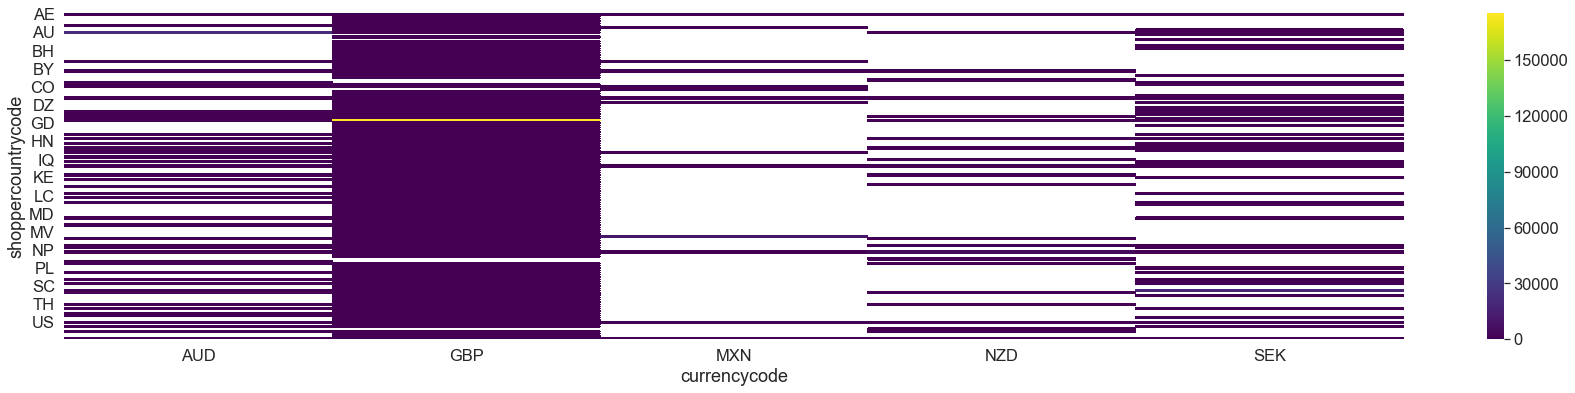

In [76]:
x_col = 'shoppercountrycode'
y_col = 'currencycode'
plot.heatmap(df[df['simple_journal']=='Settled'], x_col, y_col)

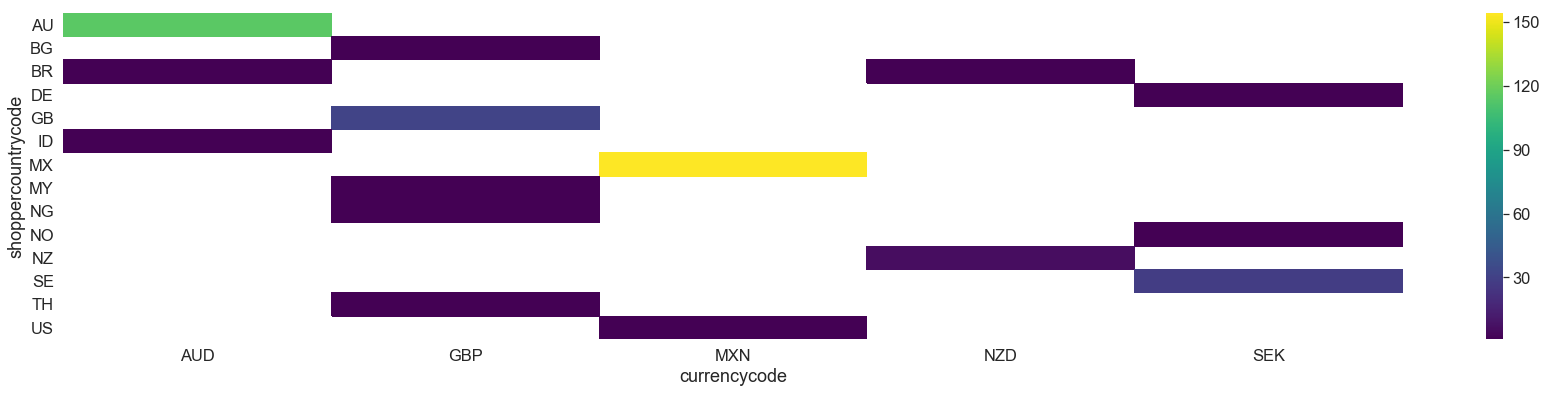

In [77]:
plot.heatmap(df[df['simple_journal']=='Chargeback'], x_col, y_col)

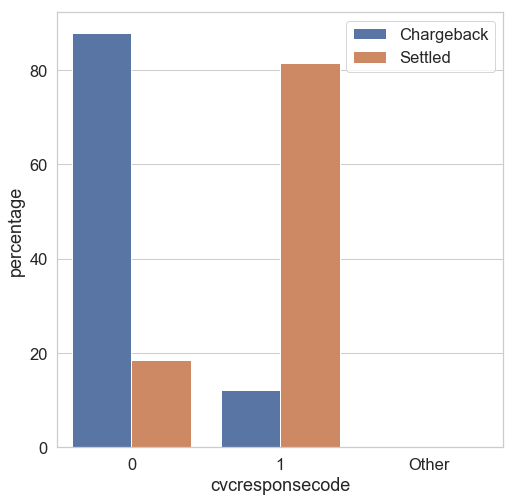

In [68]:
plot.bar(df, 'cvcresponsecode')

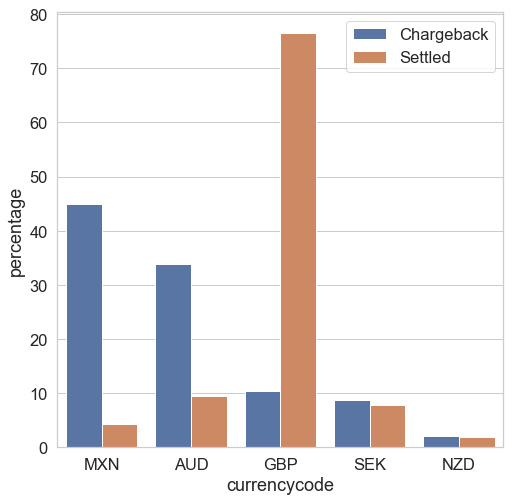

In [71]:
plot.bar(df, 'currencycode')
plot.bar(df, 'shopper')

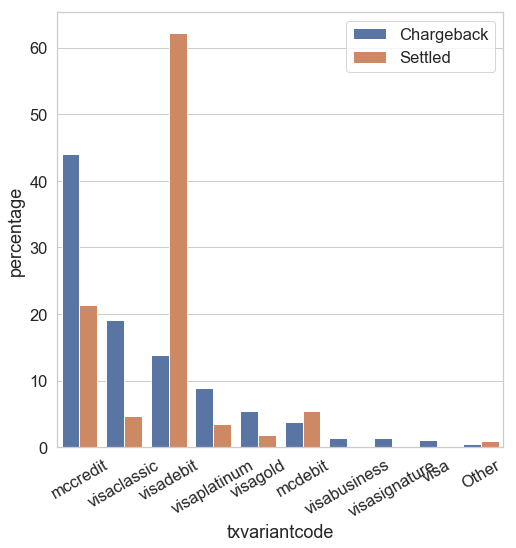

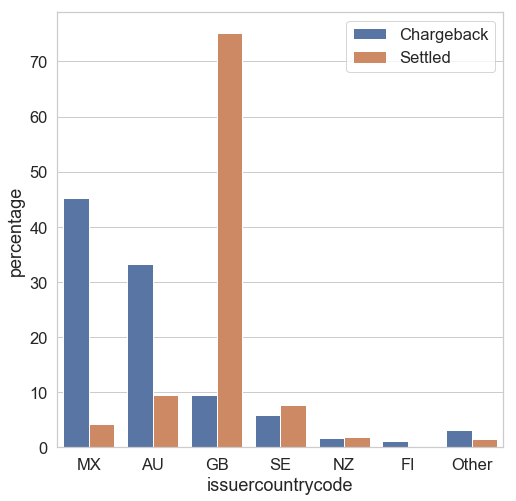

In [70]:
plot.bar(df, 'txvariantcode')
plot.bar(df, 'issuercountrycode')

In [35]:
df = preprocess.parse_data(input_path)
value_counts = df.simple_journal.value_counts()
print("Before OverSampling, counts of label 'Settled': {}".format(value_counts.Settled))
print("Before OverSampling, counts of label 'Chargeback': {}".format(value_counts.Chargeback))
df_new = preprocess.category_to_number(df)
X_train_res, X_test, y_train_res, y_test = preprocess.smote_df(df_new)
print("After OverSampling, counts of label 'Settled': {}".format(sum(y_train_res=='Settled')))
print("After OverSampling, counts of label 'Chargeback': {}".format(sum(y_train_res=='Chargeback')))

Before OverSampling, counts of label 'Settled': 236691
Before OverSampling, counts of label 'Chargeback': 345
['Settled' 'Settled' 'Settled' ... 'Chargeback' 'Chargeback' 'Chargeback']
After OverSampling, counts of label 'Settled': 165684
After OverSampling, counts of label 'Chargeback': 165684
